<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB2/blob/main/6351071043_LAB2_Bai2(Trang15_16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nguyễn Thành Luân - 6351071043

Cho Adult Income1 là dữ liệu về thu nhập của những người trẻ tuổi ở Hoa Kỳ với thuộc
tính quyết định ‘Income’. Thuộc tính này chứa hai giá trị là ‘>50K’ (thu nhập lớn hơn
50.000 USD/năm) và ‘<=50K’ (thu nhập bé hơn hoặc bằng 50.000 USD/năm). Sinh viên
hãy thực hiện những yêu cầu sau đây:

1. Nhập dữ liệu đầu vào và cho biết số lượng dữ liệu huấn luyện (tương ứng với file adult.data.csv) và số lượng dữ liệu kiểm thử (tương ứng với file adult.test.csv)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Nguyễn Thành Luân - 6351071043")

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']

train_path = 'adult.data.csv'
test_path = 'adult.test.csv'

print(f"Đang đọc dữ liệu từ: {train_path} và {test_path}...")
df_train = pd.read_csv(train_path, sep=',', header=0, skipinitialspace=True, engine='python')
df_test = pd.read_csv(test_path, sep=',', header=0, skipinitialspace=True, engine='python')

df_train['income'] = df_train['income'].astype(str).str.replace('.', '', regex=False)
df_test['income'] = df_test['income'].astype(str).str.replace('.', '', regex=False)

print(f"\nSố lượng dữ liệu huấn luyện (gốc): {len(df_train)}")
print(f"Số lượng dữ liệu kiểm thử (gốc): {len(df_test)}")

Nguyễn Thành Luân - 6351071043
Đang đọc dữ liệu từ: adult.data.csv và adult.test.csv...

Số lượng dữ liệu huấn luyện (gốc): 32561
Số lượng dữ liệu kiểm thử (gốc): 16281


2. Tiến hành tiền xử lý dữ liệu:

• Xóa những dòng có chứa dữ liệu trống, biết rằng dữ liệu trống được ký hiệu bằng
dấu ‘?’.

• Xóa cột final weight ‘fnlwgt’ trong dữ liệu huấn luyện vì cột này không có trong
dữ liệu kiểm thử.

• Nối dữ liệu huấn luyện và kiểm thử lại với nhau để phục vụ các bước tiếp theo

In [5]:
df_train.replace('?', np.nan, inplace=True)
df_test.replace('?', np.nan, inplace=True)

df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

df_train.drop('fnlwgt', axis=1, inplace=True, errors='ignore')
df_test.drop('fnlwgt', axis=1, inplace=True, errors='ignore')

data = pd.concat([df_train, df_test], ignore_index=True)

print("Nguyễn Thành Luân - 6351071043")
data.info()

print(f"\nSố lượng sau khi làm sạch: {len(df_train)} (Train), {len(df_test)} (Test)")

Nguyễn Thành Luân - 6351071043
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   education       45222 non-null  object
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  income          45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB

Số lượng sau khi làm sạch: 30162 (Train), 15060 (Test)


3. Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột
nào có giá trị tương đồng cao thì hãy loại bỏ.

Nguyễn Thành Luân - 6351071043


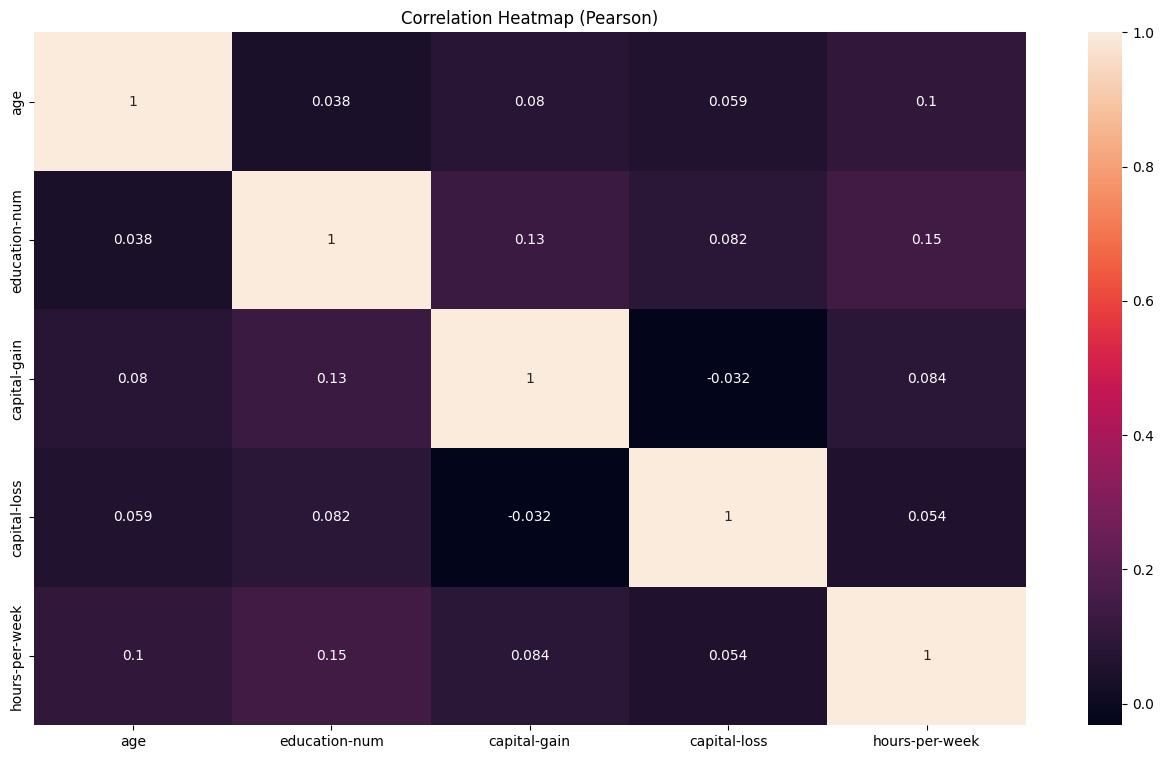

In [6]:
print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(16, 9))
correlation_matrix = data.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap (Pearson)")
plt.show()


4. Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
phần chứa riêng thuộc tính quyết định.

In [7]:
features = data.drop('income', axis=1)
labels = data['income']

print("Nguyễn Thành Luân - 6351071043")
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Nguyễn Thành Luân - 6351071043
Features shape: (45222, 13)
Labels shape: (45222,)


5. Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu
vào của thư viện.

In [8]:
print("Nguyễn Thành Luân - 6351071043")

categorical_cols = features.select_dtypes(exclude=['int64']).columns
print("Các cột cần chuyển đổi:", categorical_cols)

features_onehot = pd.get_dummies(features, columns=categorical_cols)

print("Dữ liệu features sau khi One-hot encoding:")
features_onehot

Nguyễn Thành Luân - 6351071043
Các cột cần chuyển đổi: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')
Dữ liệu features sau khi One-hot encoding:


age  education-num  capital-gain  capital-loss  hours-per-week  \
0       39             13          2174             0              40   
1       50             13             0             0              13   
2       38              9             0             0              40   
3       53              7             0             0              40   
4       28             13             0             0              40   
...    ...            ...           ...           ...             ...   
45217   33             13             0             0              40   
45218   39             13             0             0              36   
45219   38             13             0             0              50   
45220   44             13          5455             0              40   
45221   35             13             0             0              60   

       workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                      False                False              False   
1                      False                False              False   
2                      False                False               True   
3                      False                False               True   
4                      False                False               True   
...                      ...                  ...                ...   
45217                  False                False               True   
45218                  False                False               True   
45219                  False                False               True   
45220                  False                False               True   
45221                  False                False              False   

       workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0                       False                       False  ...   
1                       False                        True  ...   
2                       False                       False  ...   
3                       False                       False  ...   
4                       False                       False  ...   
...                       ...                         ...  ...   
45217                   False                       False  ...   
45218                   False                       False  ...   
45219                   False                       False  ...   
45220                   False                       False  ...   
45221                    True                       False  ...   

       native-country_Portugal  native-country_Puerto-Rico  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3                        False                       False   
4                        False                       False   
...                        ...                         ...   
45217                    False                       False   
45218                    False                       False   
45219                    False                       False   
45220                    False                       False   
45221                    False                       False   

       native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        False                 False                  False   
1                        False                 False                  False   
2                        False                 False                  False   
3                        False                 False                  False   
4                        False                 False                  False   
...                        ...                   ...                    ...   
45217                    False                 False                  False   
45218                    False                 False                  False   
45219           

6. Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.

In [9]:
n_train = len(df_train)

X_train = features_onehot[:n_train]
X_test = features_onehot[n_train:]
y_train = labels[:n_train]
y_test = labels[n_train:]

print("Nguyễn Thành Luân - 6351071043")
print("Kích thước tập Train:", X_train.shape)
print("Kích thước tập Test:", X_test.shape)

Nguyễn Thành Luân - 6351071043
Kích thước tập Train: (30162, 103)
Kích thước tập Test: (15060, 103)


7. Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả
của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.

Nguyễn Thành Luân - 6351071043
Accuracy (ID3): 0.8175298804780876
Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88     11360
        >50K       0.63      0.62      0.62      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.75      0.75     15060
weighted avg       0.82      0.82      0.82     15060

Nguyễn Thành Luân - 6351071043


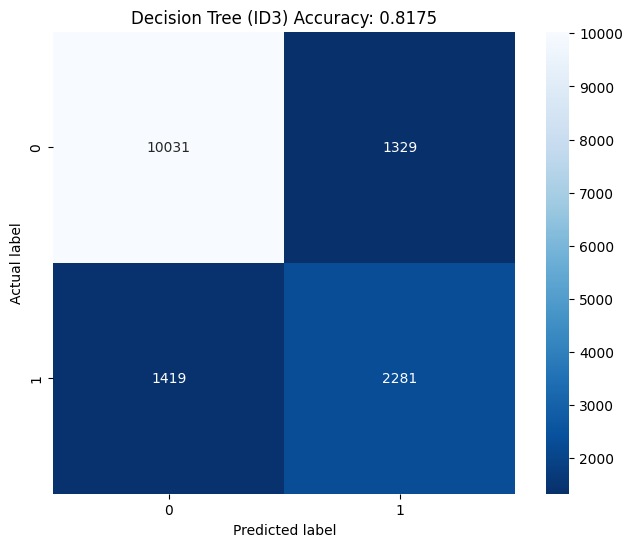

Nguyễn Thành Luân - 6351071043


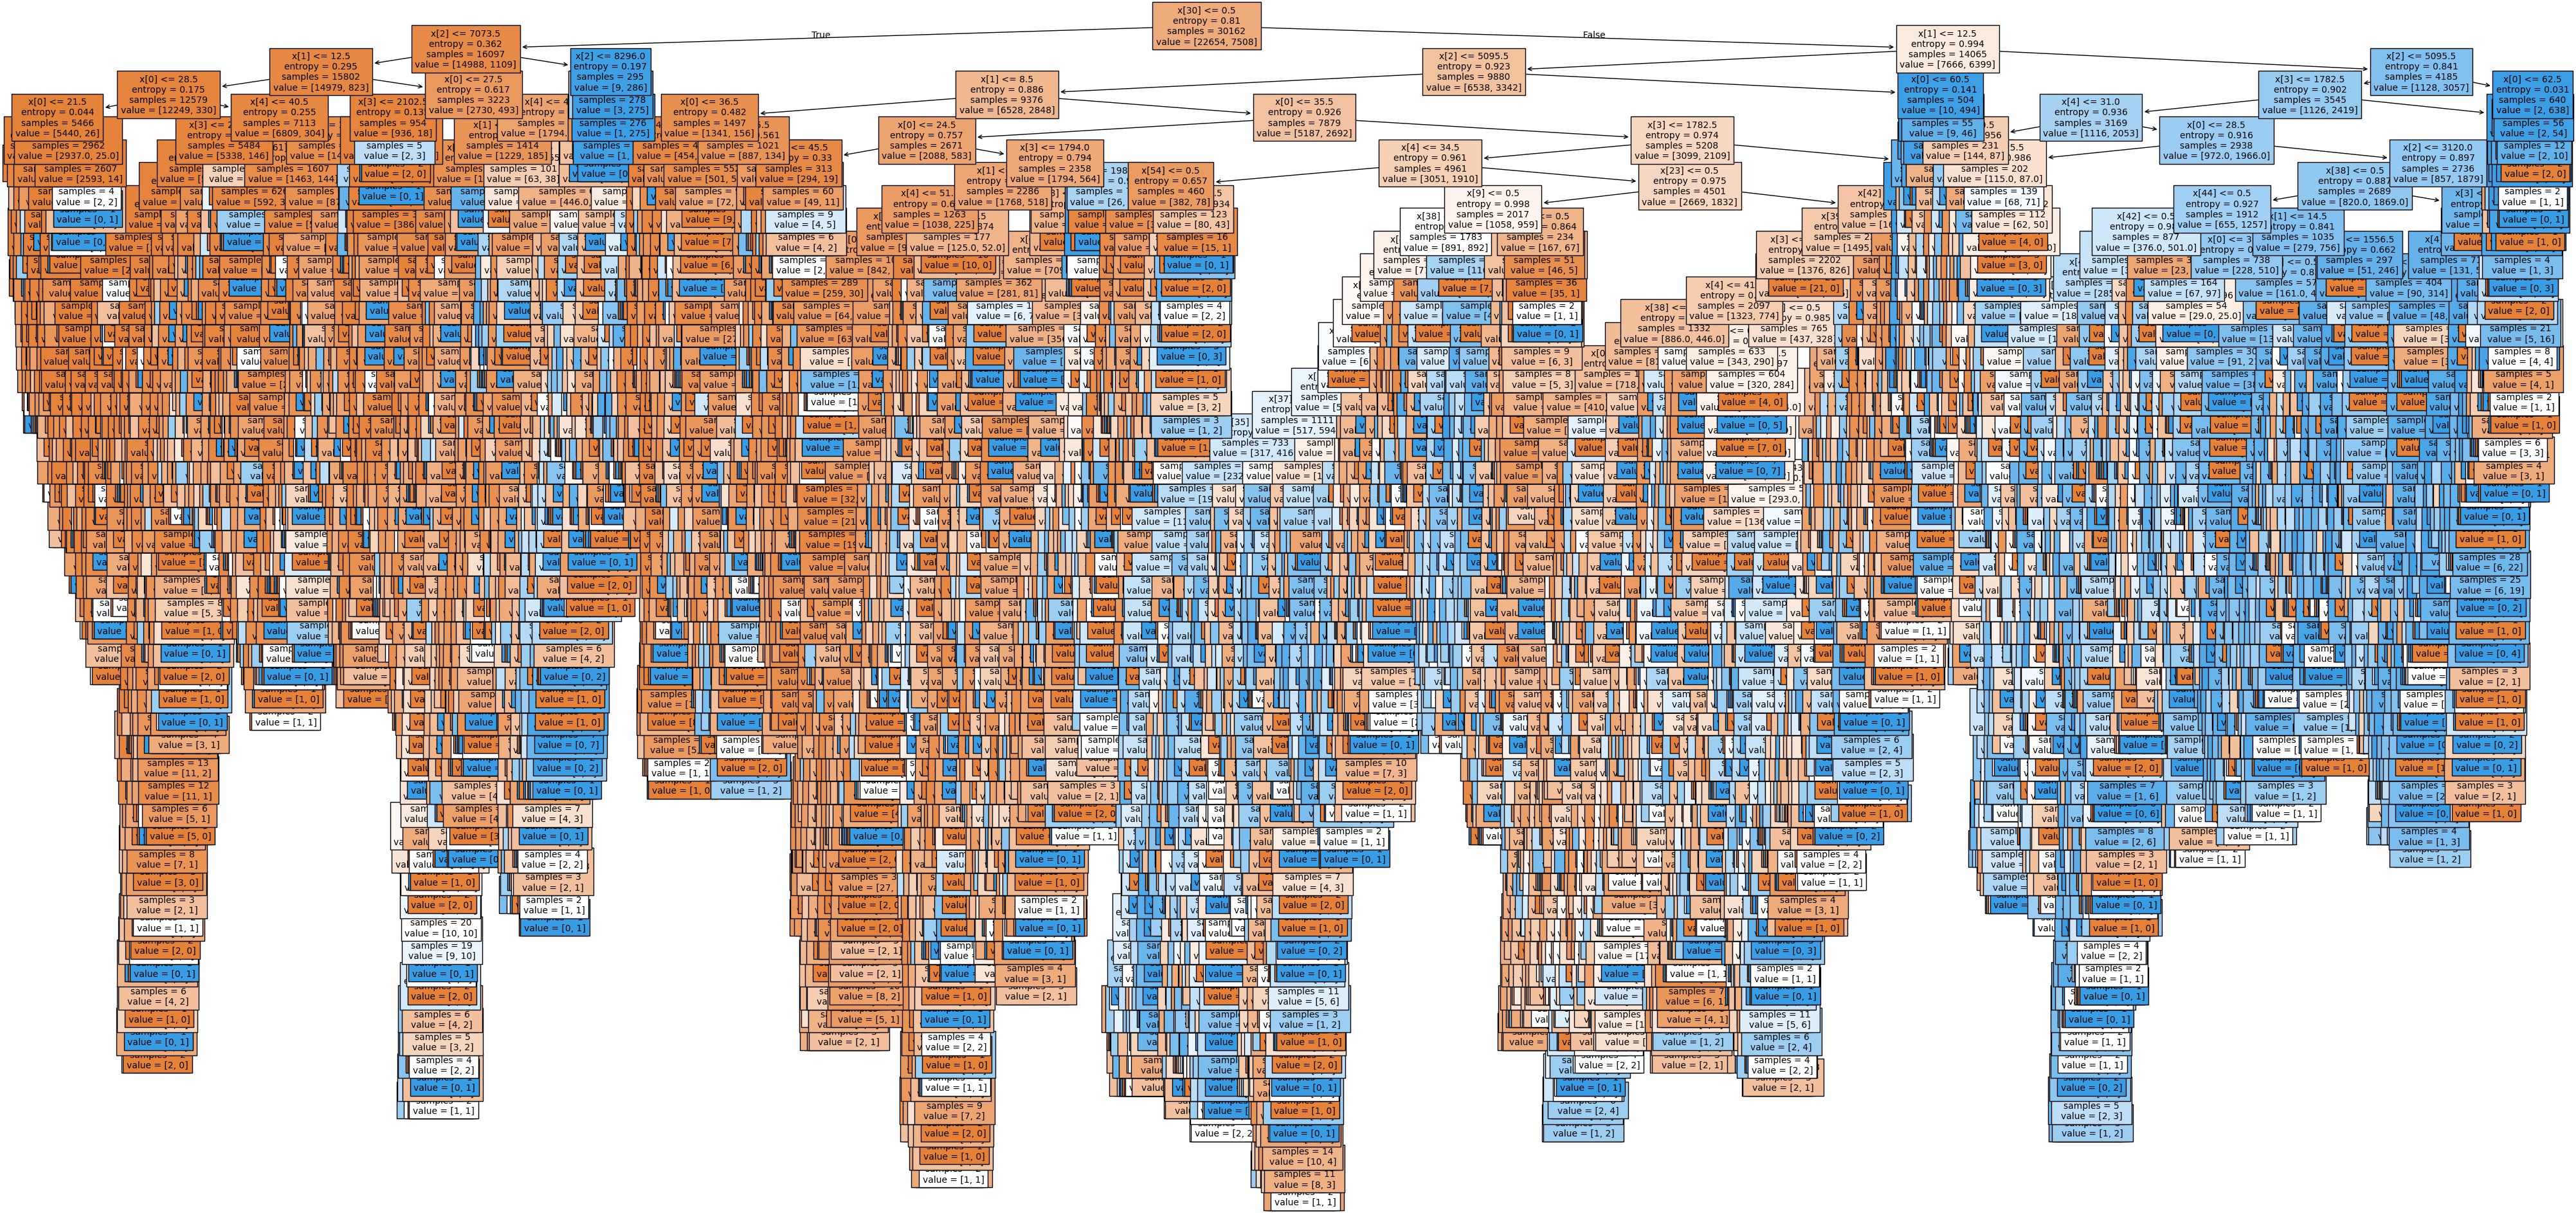

In [10]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)

print("Nguyễn Thành Luân - 6351071043")
clf.fit(X_train, y_train)

tree_pred = clf.predict(X_test)

tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy (ID3):", tree_score)
print("Report:\n", metrics.classification_report(y_test, tree_pred))


print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(8, 6))
tree_cm = metrics.confusion_matrix(y_test, tree_pred)
sns.heatmap(tree_cm, annot=True, fmt=".0f", cmap='Blues_r', square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Decision Tree (ID3) Accuracy: {tree_score:.4f}')
plt.show()

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10)
plt.savefig('decision_tree.png', dpi=100)
plt.show()

8. Lặp lại yêu cầu 7 đối với cây CART.

Nguyễn Thành Luân - 6351071043
Accuracy (CART): 0.8122841965471448
Report:
               precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     11360
        >50K       0.62      0.60      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.74      0.74     15060
weighted avg       0.81      0.81      0.81     15060

Nguyễn Thành Luân - 6351071043


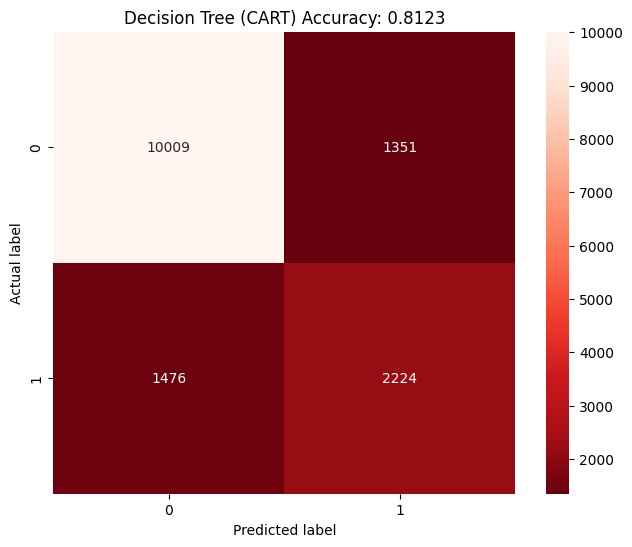

Nguyễn Thành Luân - 6351071043


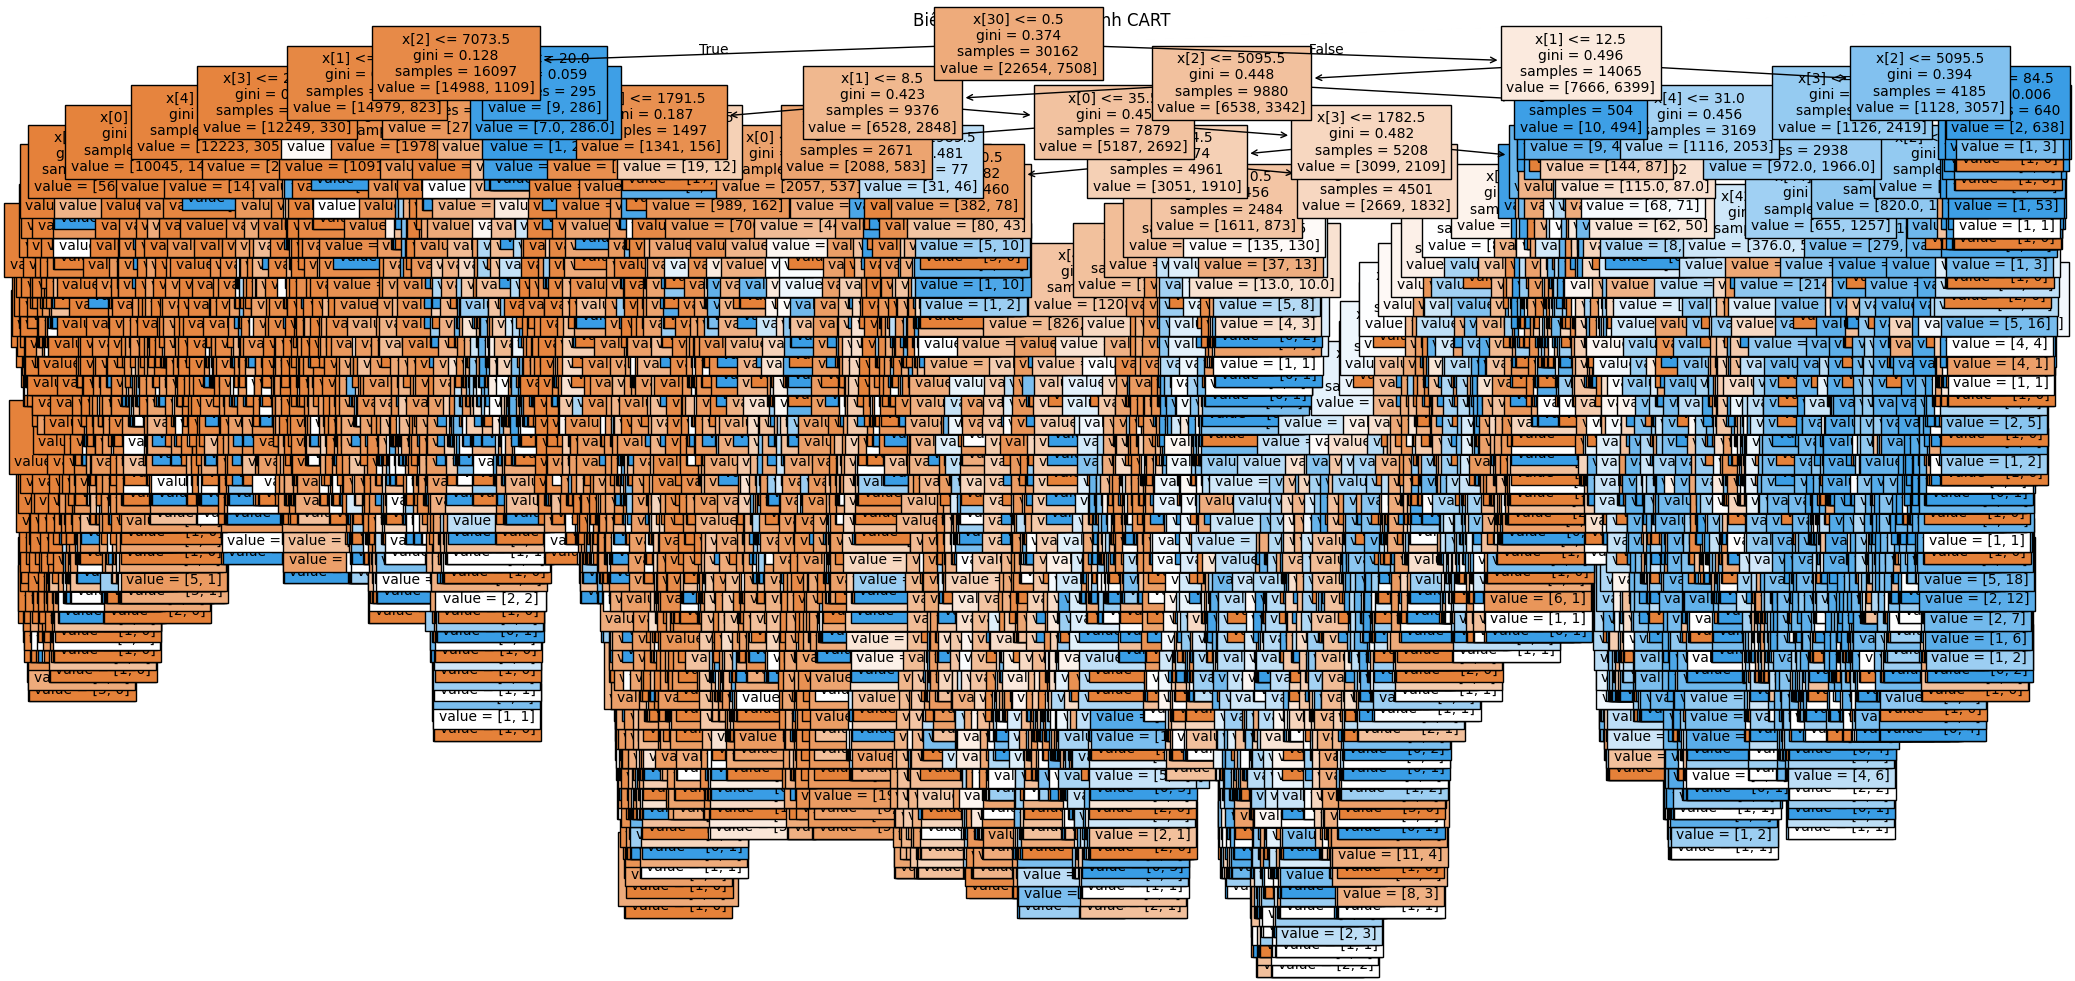

In [11]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

clf_cart = tree.DecisionTreeClassifier(criterion="gini", random_state=0)

print("Nguyễn Thành Luân - 6351071043")
clf_cart.fit(X_train, y_train)

cart_pred = clf_cart.predict(X_test)

cart_score = metrics.accuracy_score(y_test, cart_pred)
print("Accuracy (CART):", cart_score)
print("Report:\n", metrics.classification_report(y_test, cart_pred))

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(8, 6))
cart_cm = metrics.confusion_matrix(y_test, cart_pred)
sns.heatmap(cart_cm, annot=True, fmt=".0f", cmap='Reds_r', square=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Decision Tree (CART) Accuracy: {cart_score:.4f}')
plt.show()

print("Nguyễn Thành Luân - 6351071043")
plt.figure(figsize=(25, 12))
tree.plot_tree(clf_cart, filled=True, fontsize=10)
plt.title("Biểu diễn Cây quyết định CART")

plt.savefig('decision_tree_cart.png', dpi=100)
plt.show()

9. Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt
được.

Nguyễn Thành Luân - 6351071043
Naïve Bayes Accuracy: 0.8029216467463479
Report:
               precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



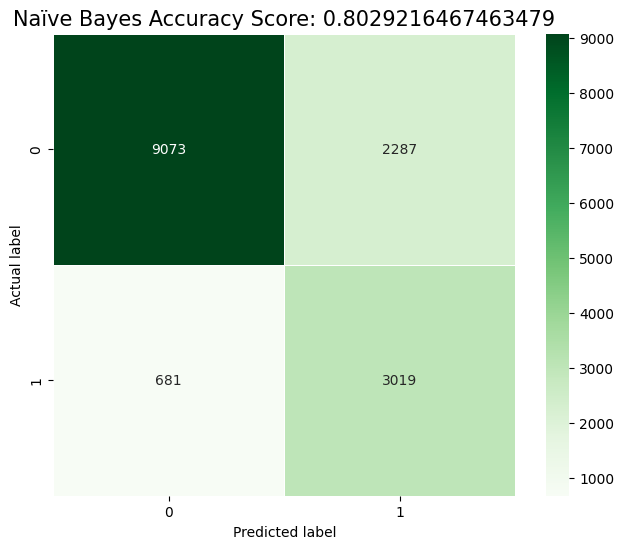

Nguyễn Thành Luân - 6351071043


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

gnb = GaussianNB()
print("Nguyễn Thành Luân - 6351071043")
gnb.fit(X_train, y_train)

bayes_pred = gnb.predict(X_test)

bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Naïve Bayes Accuracy:", bayes_score)
print("Report:\n", metrics.classification_report(y_test, bayes_pred))

bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(8,6))
sns.heatmap(bayes_cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Naïve Bayes Accuracy Score: {bayes_score}', size=15)
plt.show()
print("Nguyễn Thành Luân - 6351071043")

10.So sánh kết quả của các mô hình trên.

Nguyễn Thành Luân - 6351071043
                  Model  Accuracy
0   Decision Tree (ID3)  0.817530
1  Decision Tree (CART)  0.812284
2           Naïve Bayes  0.802922


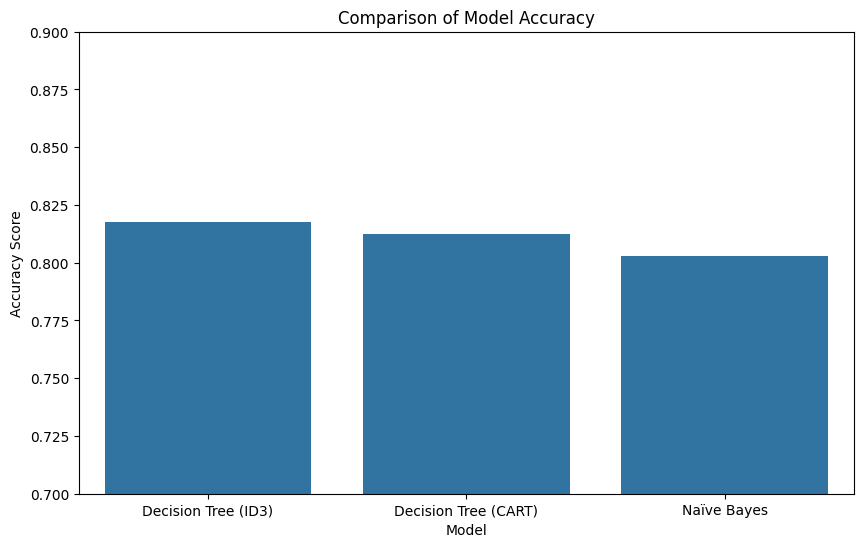

In [15]:
results = pd.DataFrame({
    'Model': ['Decision Tree (ID3)', 'Decision Tree (CART)', 'Naïve Bayes'],
    'Accuracy': [tree_score, cart_score, bayes_score]
})

print("Nguyễn Thành Luân - 6351071043")
print(results)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.ylim(0.7, 0.9)
plt.title('Comparison of Model Accuracy')
plt.ylabel('Accuracy Score')
plt.show()